# Working with Sample Data

### Import the packages and data 

In [8]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [12, 12]
pd.set_option("precision", 5)

data = pd.read_pickle("cleaned_data.pkl")

## Working with K-means

### Loading the data 

In [9]:
data.dtypes

UniqueID              int64
Facility             object
Payer                object
SpecificService      object
CategoryofService    object
Sex                  object
Age                   int64
dtype: object

In [10]:
import numpy as np

numerical_data = data.select_dtypes(np.number)
categorical_data = data.select_dtypes([object, "category"])

In [11]:
for col in numerical_data.columns:
    numerical_data[col].fillna(numerical_data[col].mean(), inplace=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data)
numerical_data_normalized = pd.DataFrame(
                    numerical_data_normalized,
                    columns=numerical_data.columns) 

In [13]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True
)

In [14]:
data_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
)
data_processed.head(5)

,UniqueID,Age,Facility_CCB,Facility_HCIS,Facility_HCS,Payer_ADVANCECARE,Payer_MULTICARE,Payer_MÉDIS,Payer_OUTROS,Payer_PARTICULARES,...,CategoryofService_CONSULTA EXTERNA,CategoryofService_EQUIPA CIRURGICA,CategoryofService_EXAMES ESPECIAIS,CategoryofService_IMAGIOLOGIA,CategoryofService_INTERNAMENTO,CategoryofService_Internamento GDHS,CategoryofService_PATOLOGIA CLINICA,CategoryofService_SERVIÇOS E TÉCNICAS GERAIS,CategoryofService_URGÊNCIAS,Sex_M
0,0.00000,0.700,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.00000,0.700,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.00000,0.700,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.00000,0.700,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05263,0.575,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
data_processed.shape

(44, 48)

### K-means

In [16]:
from sklearn.cluster import KMeans

In [17]:
estimator_kmeans = KMeans(random_state=42, n_clusters=3)
estimator_kmeans.fit(data_processed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [18]:
cluster_labels = estimator_kmeans.labels_

In [19]:
#seperate the data into test and train and use train all the way and use ".predict" for the test

In [20]:
centroids = estimator_kmeans.cluster_centers_

In [21]:
centroids.shape

(3, 48)

In [22]:
estimator_kmeans.inertia_

114.20718980308719

In [23]:
from sklearn.metrics import euclidean_distances

In [24]:
centroid_distances = euclidean_distances(centroids)

In [25]:
centroid_distances.shape

(3, 3)

In [26]:
estimator_kmeans.labels_.shape

(44,)

In [27]:
data["Cluster"] = cluster_labels
data.head()

,UniqueID,Facility,Payer,SpecificService,CategoryofService,Sex,Age,Cluster
0,1,HCIS,PARTICULARES,RX CONVENCIONAL,CONSULTA EXTERNA,F,58,2
1,1,CCA,PARTICULARES,URGÊNCIA GERAL,URGÊNCIAS,F,58,2
2,1,HCS,ADSE,GASTROENTEROLOGIA,IMAGIOLOGIA,F,58,1
3,1,HCIS,ADSE,RECOBRO,NaN,F,58,0
4,2,HCS,ADSE,NEURO-CIRURGIA,URGÊNCIAS,F,48,1


In [28]:
def cluster_summary(cluster_id):
    cluster = data[Cluster==cluster_id]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    cluster_summary["cluster_id"] = cluster_id
    return cluster_summary

In [29]:
cluster = data[data.Cluster==2]
cluster[categorical_data.columns].mode().to_dict(orient="records")

[{'Facility': 'CCB',
  'Payer': 'PARTICULARES',
  'SpecificService': 'CARDIOLOGIA',
  'CategoryofService': 'EXAMES ESPECIAIS',
  'Sex': 'F'},
 {'Facility': nan,
  'Payer': nan,
  'SpecificService': 'URGÊNCIA GERAL',
  'CategoryofService': nan,
  'Sex': nan}]

In [30]:
cluster_summary(1)

NameError: name 'Cluster' is not defined

In [53]:
# Distance between centroid of cluster 0 and 2 
centroid_distances[0,2]

1.395437925314091

In [ ]:
def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [ ]:
cluster_comparison(0,1,2)

In [31]:
def kmeans_cluster(df, n_clusters=3):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def graph_summary_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [32]:
cluster_results = kmeans_cluster(data_processed, 3)
cluster_summary = graph_summary_clustering(cluster_results);
cluster_summary

,Age,CategoryofService_CIRURGIAS,CategoryofService_CONSULTA EXTERNA,CategoryofService_EQUIPA CIRURGICA,CategoryofService_EXAMES ESPECIAIS,CategoryofService_IMAGIOLOGIA,CategoryofService_INTERNAMENTO,CategoryofService_Internamento GDHS,CategoryofService_PATOLOGIA CLINICA,CategoryofService_SERVIÇOS E TÉCNICAS GERAIS,...,SpecificService_RESSONÂNCIA,SpecificService_REUMATOLOGIA,SpecificService_RX CONVENCIONAL,SpecificService_SERVIÇOS E TÉCNICAS GERAIS,SpecificService_SERVIÇOS ESPECIAIS CARDIOLOGIA,SpecificService_SERVIÇOS ESPECIAIS GASTROENTEROLOGIA,SpecificService_SERVIÇOS ESPECIAIS OFTALMOLOGIA,SpecificService_SISTEMA MUSCULO ESQUELÉTICO,SpecificService_URGÊNCIA GERAL,UniqueID
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.48333,0.00000,0.33333,0.00000,0.00000,0.06667,0.06667,0.00000,0.13333,0.06667,...,0.00000,0.06667,0.00000,0.26667,0.06667,0.00000,0.00000,0.06667,0.06667,0.57193
1,0.56645,0.05263,0.36842,0.05263,0.10526,0.21053,0.00000,0.05263,0.00000,0.05263,...,0.05263,0.00000,0.05263,0.00000,0.00000,0.05263,0.05263,0.00000,0.05263,0.53463
2,0.66375,0.00000,0.30000,0.00000,0.40000,0.10000,0.00000,0.00000,0.00000,0.00000,...,0.10000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20000,0.36316


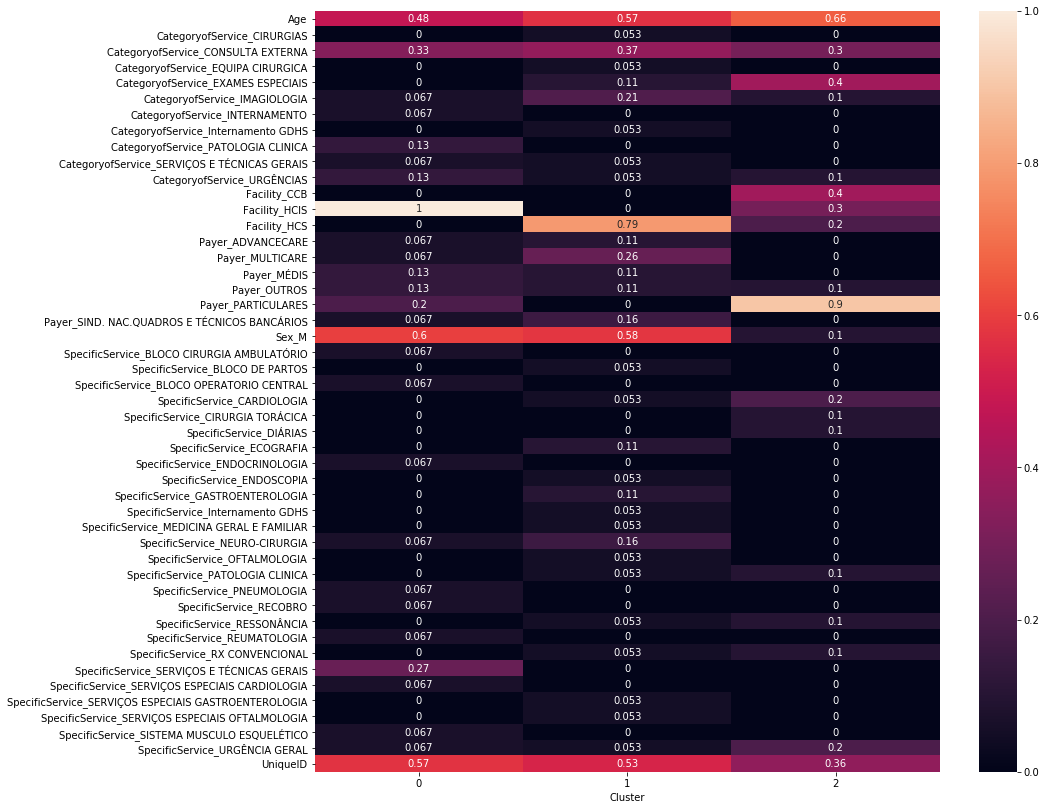

In [33]:
matplotlib.rcParams['figure.figsize'] = [14, 14]
import seaborn as sns
sns.heatmap(cluster_summary.transpose(), annot=True);

### Ideal number of clusters?

In [34]:
from scipy.spatial.distance import cdist

In [35]:
total_variance = cdist(
    XA=data_processed, 
    XB=np.array([data_processed.mean()]))

In [36]:
total_variance_sum = total_variance.sum()

In [37]:
#functions to calculate the Within-Cluster sum of squares (WSS)
def cluster_variance(cluster_id, cluster_centroid, cluster_labels):
    cluster_elements = data_processed[cluster_labels==cluster_id]
    return cdist(XA=cluster_elements, XB=np.array([cluster_centroid])).sum()

#explained variance (defined as the reduction of variance compared to the total variance,...
# ... which would be the variance where k=1).
def variance_measure(estimator_kmeans, total_variance):
    clusters_labels = estimator_kmeans.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(clusters_labels)):
        cluster_centroid = estimator_kmeans.cluster_centers_[i]
        wss += cluster_variance(cluster_id, cluster_centroid, clusters_labels)
    return (total_variance-wss) / total_variance

In [38]:
# Function that returns the inertia.
def inertia_measure(estimator_kmeans):
    return estimator_kmeans.inertia_

In [39]:
# Create a function that evaluates the intertia and percentage variance explained for a value of K
def evaluate_k_kmeans(k, scoring, **kwargs):
    scoring_measure = None
    if scoring=="inertia":
        scoring_measure = inertia_measure
    elif scoring=="variance":
        scoring_measure = variance_measure
        
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(data_processed)
    return scoring_measure(estimator_kmeans, **kwargs)

In [54]:
results_k = {}
range_k = [1,2,3,4,5,6,7,8,9] #range_k gives the number of clusters to evaluate their inertia and variance
for k in range_k:
    results_k[k] = (
        evaluate_k_kmeans(k, "inertia"), 
        evaluate_k_kmeans(k, "variance", total_variance=total_variance_sum), 
    )

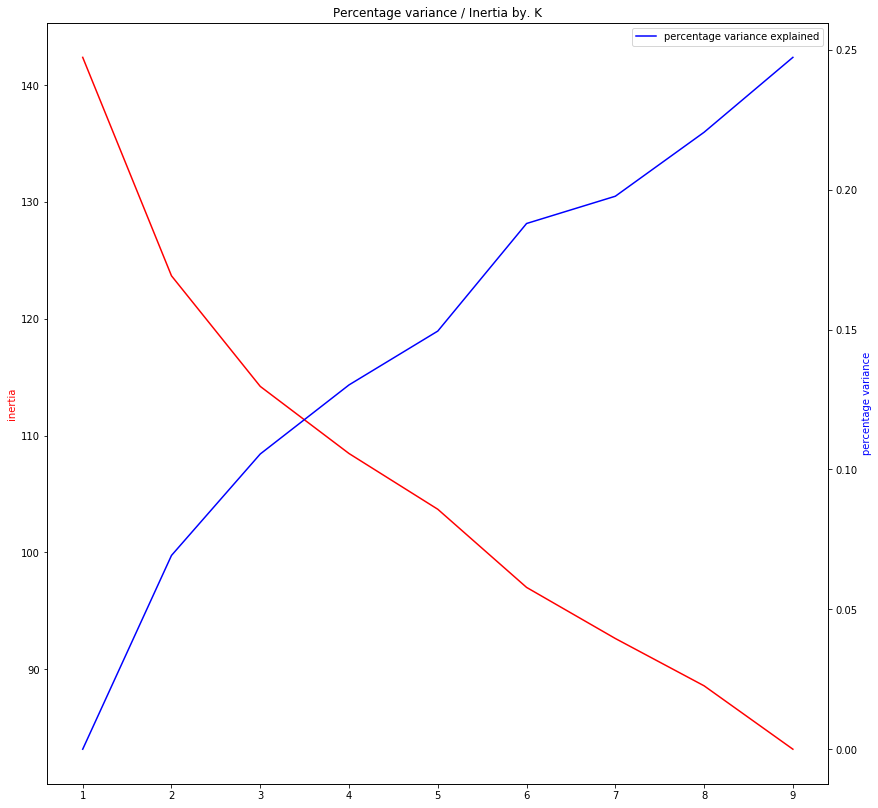

In [41]:
fig, ax1 = plt.subplots()

ax1.plot(
    [c[0] for c in results_k.items()],
    [c[1][0] for c in results_k.items()], label="inertia", color="red")
ax1.set_ylabel('inertia', color="red")


ax2 = ax1.twinx()
ax2.plot(
    [c[0] for c in results_k.items()],
    [c[1][1] for c in results_k.items()], label="percentage variance explained", color="blue")
ax2.set_ylabel('percentage variance', color='blue')

plt.xlabel("K")
plt.legend()
plt.title("Percentage variance / Inertia by. K");

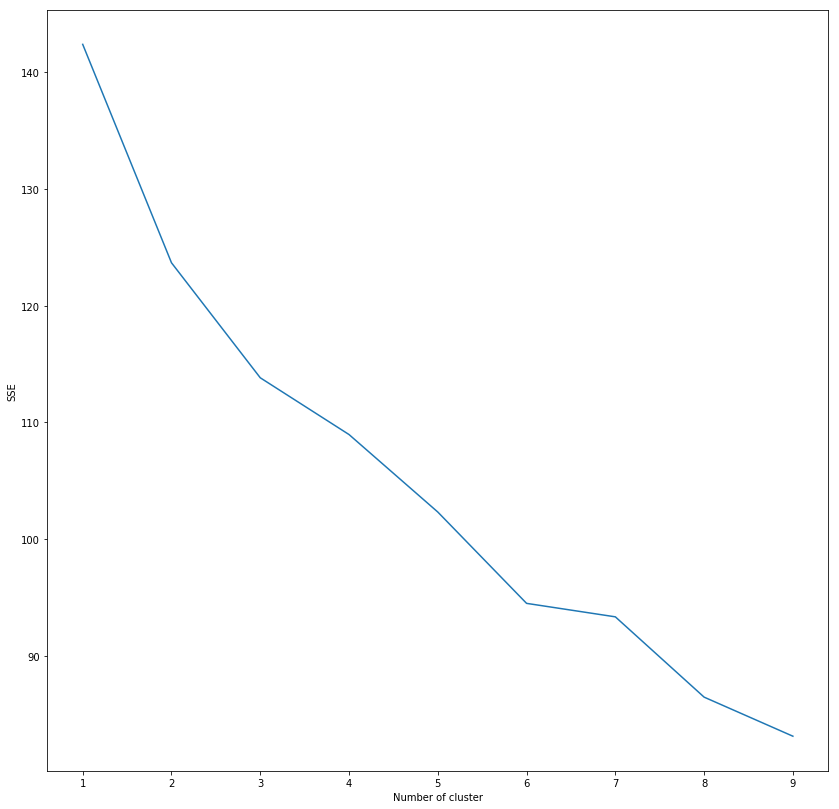

In [42]:
sse = {}
for k in range(1, 10):
   kmeans = KMeans(n_clusters=k).fit(data_processed)
   #print(data["clusters"])
   sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Change the number of clusters 

In [43]:
clusterer = KMeans(n_clusters=6)
clusterer.fit(data_processed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

In [45]:
def silhouette_score_cv(clusterer, X, y=None):
    cluster_labels = clusterer.fit_predict(X)
    return silhouette_score(X, cluster_labels)

In [46]:
cross_val_score(clusterer, data_processed, y=None, 
                scoring=silhouette_score_cv, cv=3).mean() #a small value means it is well matched

0.10054713599304362

In [47]:
pd.Series(clusterer.labels_).value_counts()

2    11
1    10
3     7
0     6
5     5
4     5
dtype: int64

In [48]:
new_clusters = clusterer.labels_
data["Cluster"] = new_clusters
data.head()

,UniqueID,Facility,Payer,SpecificService,CategoryofService,Sex,Age,Cluster
0,1,HCIS,PARTICULARES,RX CONVENCIONAL,CONSULTA EXTERNA,F,58,1
1,1,CCA,PARTICULARES,URGÊNCIA GERAL,URGÊNCIAS,F,58,1
2,1,HCS,ADSE,GASTROENTEROLOGIA,IMAGIOLOGIA,F,58,5
3,1,HCIS,ADSE,RECOBRO,NaN,F,58,1
4,2,HCS,ADSE,NEURO-CIRURGIA,URGÊNCIAS,F,48,5
